In [4]:
## install required packages
!pip install yfinance
!pip install plotly
!pip install bs4
!pip install pandas
!pip install requests


In [5]:
## import required packages
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import requests
from bs4 import BeautifulSoup


In [ ]:
#Question 1: Use yfinance to Extract Stock Data

In [6]:
## put the stock shortcut in this case TESLA aka TSLA into the tcker function to get the data
tesla = yf.Ticker('TSLA')

In [13]:
## convert the data into historical data and display first 5 row
tesla_data = tesla.history(period="max")
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


In [38]:
## convert rownames into a column so that we can extract information from the date column if necessary
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


In [ ]:
#Question 2: Use Webscraping to Extract Tesla Revenue Data

In [11]:
## define html data using an url defined in the question
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
html_data = requests.get(url).text

In [16]:
## store the html data into soup using BeatifulSoup function
soup = BeautifulSoup(html_data,"html5lib")

In [17]:
## get the data from Tesla Quarterly Revenue table and store it in tesla_revenue after cleaning the data as requested.

tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for table in soup.find_all('table'):

    if ('Tesla Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')

                tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

In [52]:
## check if there is any na or empty rows in tesla revenue
#tesla_revenue

In [22]:
## remove the na's and empty rows from the tesla_revenue
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()

,Date,Revenue
45,2010-09-30,31
46,2010-06-30,28
47,2010-03-31,21
49,2009-09-30,46
50,2009-06-30,27


In [23]:
## Question 3: Use yfinance to Extract Stock Data

In [24]:
## put the stock shortcut in this case GAMESTOP aka GME into the tcker function to get the data
gme = yf.Ticker('GME')

In [27]:
## convert the data into historical data and display first 5 row
## convert rownames into a column so that we can extract information from the date column if necessary

gme_data = gme.history(period='max')
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,6.480513,6.773399,6.413183,6.766666,19054000,0.0,0.0
1,2002-02-14,6.850829,6.864295,6.682504,6.733002,2755400,0.0,0.0
2,2002-02-15,6.733000,6.749832,6.632005,6.699335,2097400,0.0,0.0
3,2002-02-19,6.665671,6.665671,6.312189,6.430017,1852600,0.0,0.0
4,2002-02-20,6.463681,6.648838,6.413183,6.648838,1723200,0.0,0.0


In [28]:
## Question 4: Use Webscraping to Extract GME Revenue Data

In [29]:
## define html data using an url defined in the question
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
html_data = requests.get(url).text

In [30]:
## store the html data into soup using BeatifulSoup function
soup = BeautifulSoup(html_data,"html5lib")

In [31]:
## get the data from GameStop Quarterly Revenue table and store it in gme_revenue after cleaning the data as requested.

gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for table in soup.find_all('table'):

    if ('GameStop Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')

                gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

In [32]:
gme_revenue.tail()

,Date,Revenue
47,2010-01-31,3524
48,2009-10-31,1835
49,2009-07-31,1739
50,2009-04-30,1981
51,2009-01-31,3492


In [33]:
## Question 5: Plot Tesla Stock Graph

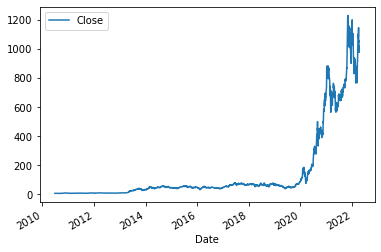

In [44]:
fig1 = tesla_data.plot(x="Date", y="Close")


In [45]:
#Question 6: Plot GameStop Stock Graph

<AxesSubplot:xlabel='Date'>

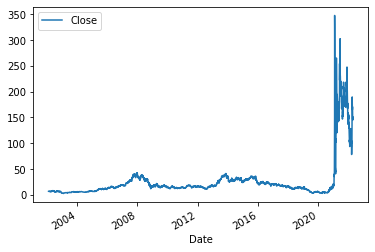

In [47]:
gme_data.plot(x="Date", y="Close")

In [48]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [49]:
make_graph(tesla_data[['Date','Close']], tesla_revenue, 'Tesla')


In [50]:
make_graph(gme_data[['Date','Close']], gme_revenue, 'GameStop')
